In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

plt.style.use(['dark_background'])

In [2]:
#   16
data    =   pd.read_csv('BTCUSD_2010_2021.csv', thousands=',')

data.Date   =   pd.to_datetime(data.Date)
# data.set_index('Date', inplace=True)
data.rename(columns={'Price': 'Close', 'Vol.':'Volume'}, inplace=True)
data.drop('Change %', axis=1, inplace=True)
data=   data[['Open', "High", "Low", "Close", "Volume", 'Date']]
data['Volume']  =   data['Volume'].replace({'K': '*1e3', 'M': '*1e6', '-':'-1'}, regex=True).map(pd.eval).astype(int)
data    =   data.reindex(index=data.index[::-1])
data.index  =   pd.date_range(data.Date.iloc[0], data.Date.iloc[-1], freq='D')
data.drop('Date', axis=1, inplace=True)

In [3]:
train   =   data.loc['2010':'2019']
test    =   data.loc['2020':]

<AxesSubplot:>

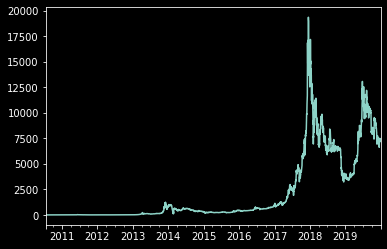

In [4]:
train.Close.plot()

<AxesSubplot:>

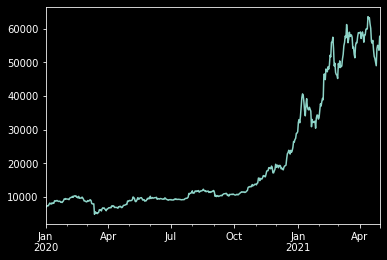

In [5]:
test.Close.plot()

In [6]:
#   17
train['target'] =   train.Close.shift(-1)
train['target'].iloc[-1]    =   train.target.iloc[-2]
test['target'] =   test.Close.shift(-1)
test['target'].iloc[-1]    =   test.target.iloc[-2]

<ipython-input-6-48ed36ddc8d8>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['target'] =   train.Close.shift(-1)
C:\Users\hdamg\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\core\indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
C:\Users\hdamg\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\core\indexing.py:692: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pyda

In [7]:
x_train =   train.drop(['target'], axis=1)
y_train =   train['target']
x_test =   test.drop(['target'], axis=1)
y_test =   test['target']

In [3]:
from assets import get_sklearn_regression, error_graph, prediction_graph, regression_performance


Regressor: GradientBoostingRegressor
RMSE: 15685.62
Performance Percentage: 0.57
Precision: 64.07
R2 Score Test =  0.176
MAE Test =  7873.446


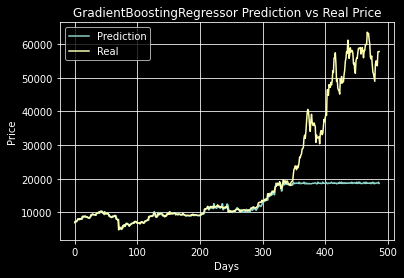

C:\Users\hdamg\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


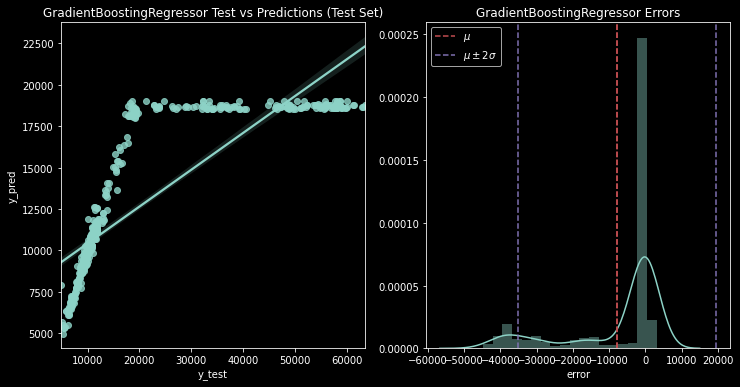


Regressor: HistGradientBoostingRegressor
RMSE: 16963.88
Performance Percentage: 0.53
Precision: 62.22
R2 Score Test =  0.037
MAE Test =  8711.371


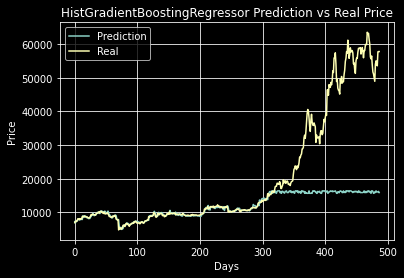

C:\Users\hdamg\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


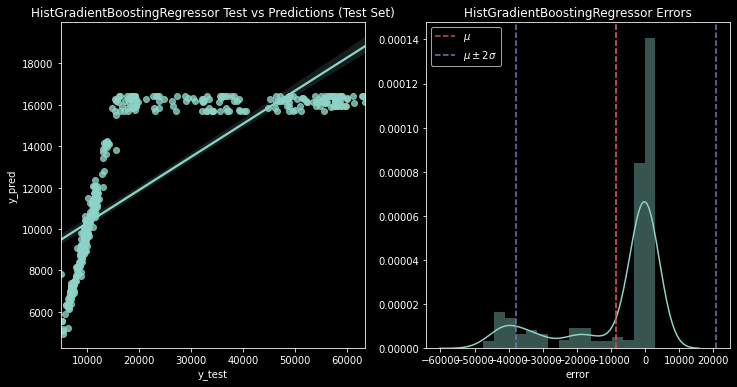


Regressor: RandomForestRegressor
RMSE: 15660.11
Performance Percentage: 0.59
Precision: 62.83
R2 Score Test =  0.179
MAE Test =  7851.936


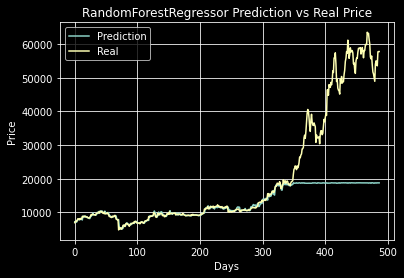

C:\Users\hdamg\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


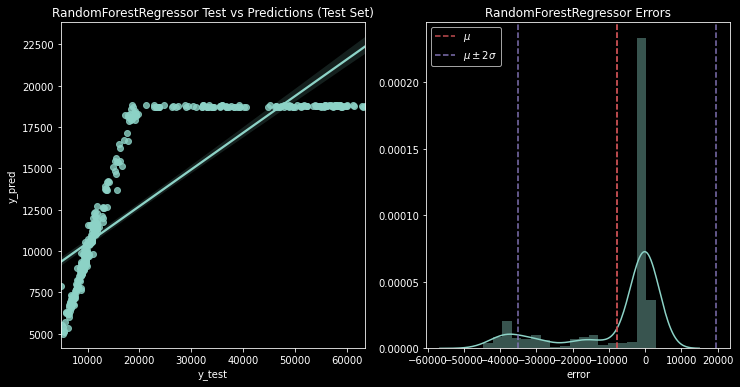


Regressor: LinearRegression
RMSE: 1090.08
Performance Percentage: 0.85
Precision: 70.64
R2 Score Test =  0.996
MAE Test =  586.691


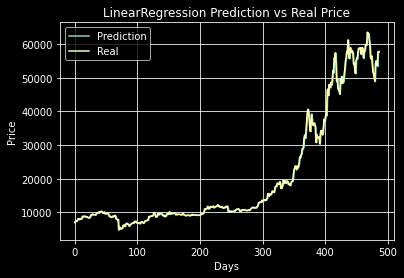

C:\Users\hdamg\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


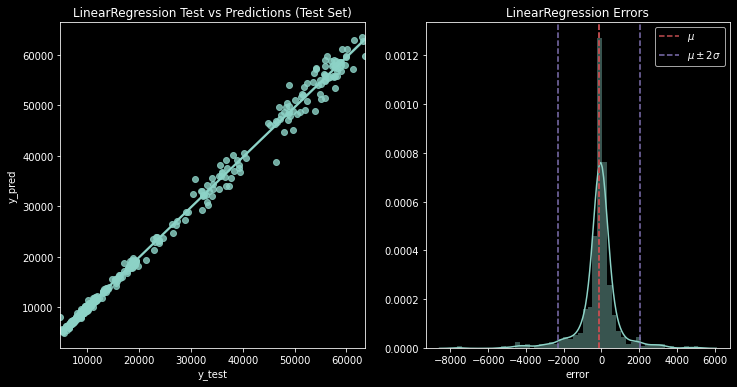


Regressor: BayesianRidge
RMSE: 1090.13
Performance Percentage: 0.85
Precision: 70.64
R2 Score Test =  0.996
MAE Test =  586.670


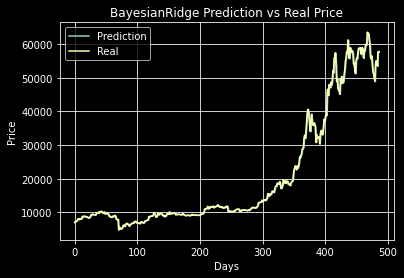

C:\Users\hdamg\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


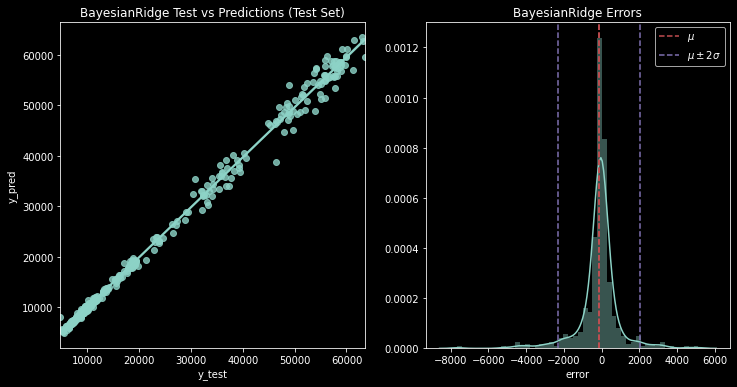


Regressor: RANSACRegressor
RMSE: 1277.64
Performance Percentage: 0.80
Precision: 68.17
R2 Score Test =  0.995
MAE Test =  714.421


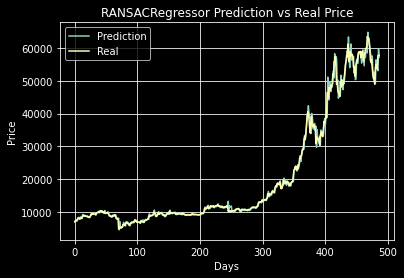

C:\Users\hdamg\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


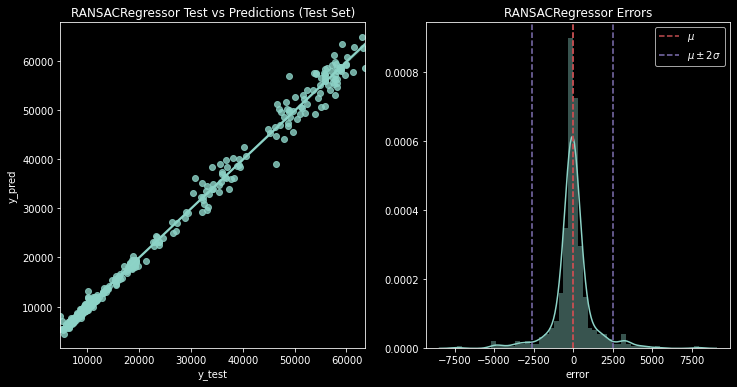


Regressor: KNeighborsRegressor
RMSE: 17027.02
Performance Percentage: 0.16
Precision: 56.88
R2 Score Test =  0.029
MAE Test =  9599.246


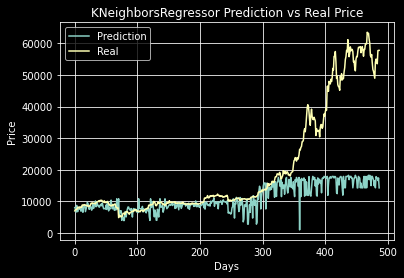

C:\Users\hdamg\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


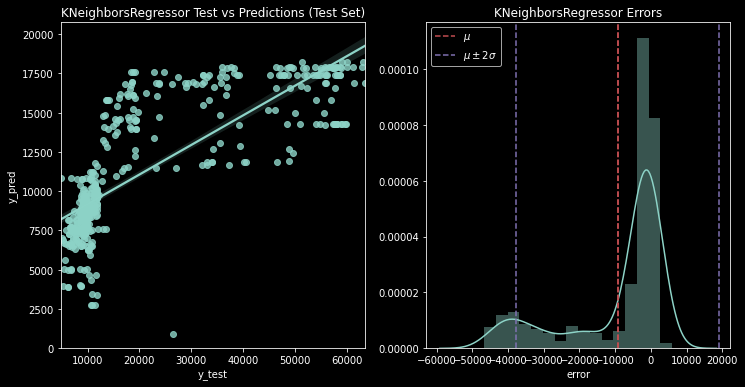


Regressor: MLPRegressor
RMSE: 1209.74
Performance Percentage: 0.82
Precision: 66.32
R2 Score Test =  0.995
MAE Test =  696.902


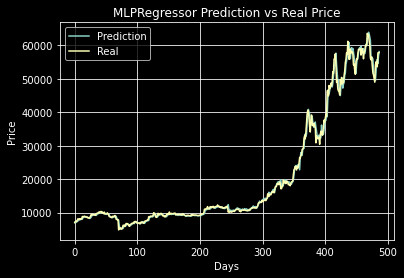

C:\Users\hdamg\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


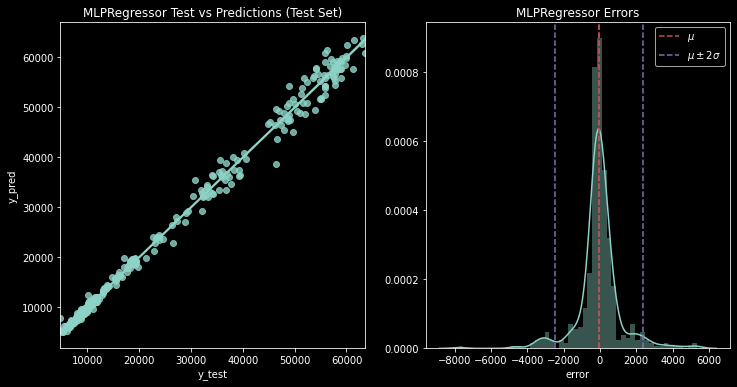


Regressor: DecisionTreeRegressor
RMSE: 15577.35
Performance Percentage: 0.40
Precision: 56.88
R2 Score Test =  0.188
MAE Test =  8001.004


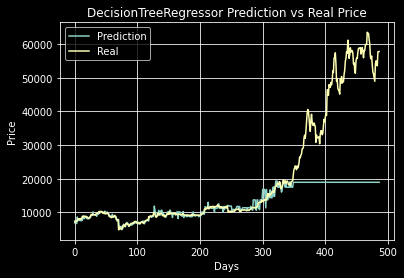

C:\Users\hdamg\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


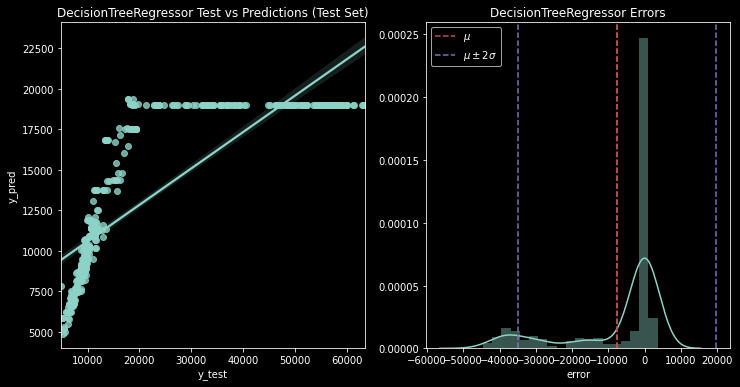

In [9]:
#   17 (LSTM and TCN are at the end of notebook)
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import (
    GradientBoostingRegressor, 
    HistGradientBoostingRegressor, 
    RandomForestRegressor, 
)
from sklearn.linear_model import (
    LinearRegression,
    BayesianRidge,
    RANSACRegressor
)
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.tree import DecisionTreeRegressor

regressors   =   [
    GradientBoostingRegressor, 
    HistGradientBoostingRegressor, 
    RandomForestRegressor, 
    LinearRegression,
    BayesianRidge,
    RANSACRegressor, KNeighborsRegressor, MLPRegressor, DecisionTreeRegressor
]

trained_regressors  =   get_sklearn_regression(regressors, x_train, y_train, x_test, y_test, graph=True, print_results=True)


In [10]:
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import DotProduct, WhiteKernel
kernel = DotProduct() + WhiteKernel()
gpr = GaussianProcessRegressor(kernel=kernel, random_state=0).fit(x_train, y_train)
pred=   gpr.predict(x_test)
performance, rmse, precision   = regression_performance(pred, y_test.to_numpy(), print_results=True)    

RMSE: 1088.99
Performance Percentage: 0.85
Precision: 70.64
R2 Score Test =  0.996
MAE Test =  585.949


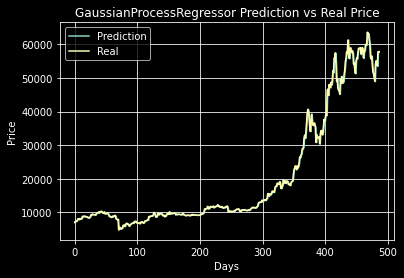

C:\Users\hdamg\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


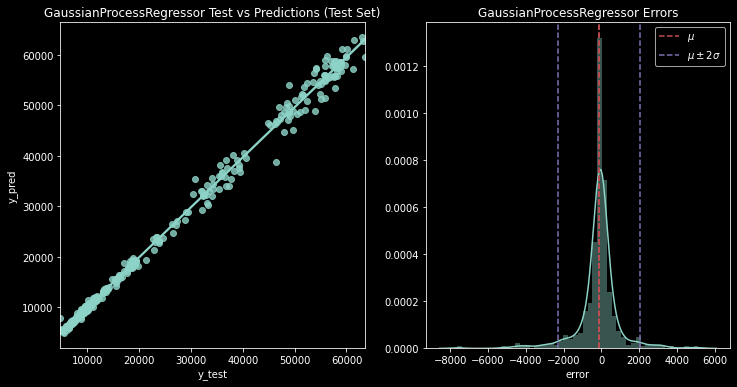

In [11]:
prediction_graph(pred, y_test.to_numpy(), model_name=gpr.__class__.__name__)
error_graph(pred, y_test.to_numpy(), model_name=gpr.__class__.__name__)

In [12]:
#   18
best_regressor  =   sorted(trained_regressors, key=lambda x:np.sqrt(mean_squared_error(x.predict(x_test), y_test)))

In [13]:
from sklearn.ensemble import VotingRegressor


vr  =   VotingRegressor([(i.__class__.__name__, i) for i in best_regressor[:5]])
vr.fit(x_train, y_train)
pred=   vr.predict(x_test)

performance, rmse, precision    = regression_performance(pred, y_test.to_numpy(), print_results=True)    

RMSE: 3216.92
Performance Percentage: 0.64
Precision: 66.32
R2 Score Test =  0.965
MAE Test =  1699.377


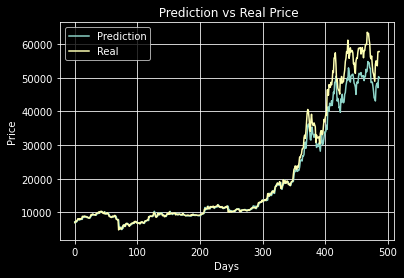

C:\Users\hdamg\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


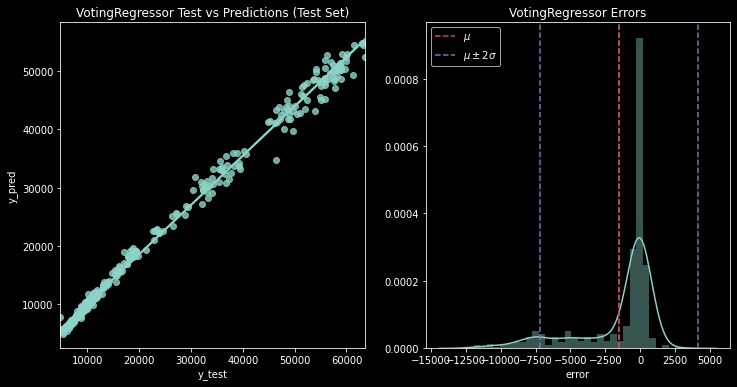

In [15]:
prediction_graph(pred, y_test.to_numpy())
error_graph(pred, y_test.to_numpy(), vr.__class__.__name__)

In [16]:
from assets import bagging_regerssion

In [17]:
bagging_regerssion(best_regressor[0:5], x_train, y_train, x_test, y_test)

Regressor: LinearRegression
RMSE: 1092.45
Performance Percentage: 0.85
Precision: 70.43
R2 Score Test =  0.996
MAE Test =  589.042
Regressor: BayesianRidge
RMSE: 1092.52
Performance Percentage: 0.85
Precision: 70.64
R2 Score Test =  0.996
MAE Test =  589.005
Regressor: MLPRegressor
RMSE: 1262.60
Performance Percentage: 0.81
Precision: 70.43
R2 Score Test =  0.995
MAE Test =  704.249
Regressor: RANSACRegressor
RMSE: 1108.70
Performance Percentage: 0.85
Precision: 71.25
R2 Score Test =  0.996
MAE Test =  590.921
Regressor: DecisionTreeRegressor
RMSE: 15754.73
Performance Percentage: 0.57
Precision: 63.04
R2 Score Test =  0.169
MAE Test =  7933.830


,LinearRegression,BayesianRidge,MLPRegressor,RANSACRegressor,DecisionTreeRegressor
0,7177.952777,7178.128487,7200.034392,7203.931858,7329.17
1,6943.339527,6943.662578,7080.026282,7001.944031,6912.94
2,7353.339540,7352.518635,7149.533791,7281.513413,7012.85
3,7357.069560,7356.974496,7362.643507,7368.708855,7196.70
4,7354.766726,7355.336768,7398.897186,7394.274128,8141.83
...,...,...,...,...,...
482,54896.628204,54892.942775,55179.654183,54779.855471,18690.69
483,54686.616875,54690.374511,55750.609928,54992.874296,18690.69
484,53342.781142,53341.906593,54666.593113,53632.101840,18690.69
485,57801.986326,57792.578718,56331.368245,56988.522091,18690.69


In [18]:
#   19
from sklearn.ensemble import AdaBoostRegressor
from sklearn.linear_model import LinearRegression
from sklearn.neural_network import MLPRegressor

get_sklearn_regression([AdaBoostRegressor], x_train, y_train, x_test, y_test, graph=False, print_results=True)
abr =   AdaBoostRegressor(base_estimator=LinearRegression(), n_estimators=10).fit(x_train, y_train)
print('\nAdaBoostRegressor, base estimator: ', 'LinearRegression')
_   =   regression_performance(abr.predict(x_test), y_test, print_results=True)
abr =   AdaBoostRegressor(base_estimator=KNeighborsRegressor(), n_estimators=10).fit(x_train, y_train)
print('\nAdaBoostRegressor, base estimator: ', 'KNeighborsRegressor')
_   =   regression_performance(abr.predict(x_test), y_test, print_results=True)
abr =   AdaBoostRegressor(base_estimator=BayesianRidge(), n_estimators=10).fit(x_train, y_train)
print('\nAdaBoostRegressor, base estimator: ', 'BayesianRidge')
_   =   regression_performance(abr.predict(x_test), y_test, print_results=True)
abr =   AdaBoostRegressor(base_estimator=RANSACRegressor(), n_estimators=10).fit(x_train, y_train)
print('\nAdaBoostRegressor, base estimator: ', 'RANSACRegressor')
_   =   regression_performance(abr.predict(x_test), y_test, print_results=True)


Regressor: AdaBoostRegressor
RMSE: 16272.33
Performance Percentage: 0.53
Precision: 60.99
R2 Score Test =  0.113
MAE Test =  8270.007

AdaBoostRegressor, base estimator:  LinearRegression
RMSE: 1209.98
Performance Percentage: 0.82
Precision: 67.97
R2 Score Test =  0.995
MAE Test =  670.755

AdaBoostRegressor, base estimator:  KNeighborsRegressor
RMSE: 16611.38
Performance Percentage: 0.16
Precision: 57.91
R2 Score Test =  0.076
MAE Test =  9285.463

AdaBoostRegressor, base estimator:  BayesianRidge
RMSE: 1162.19
Performance Percentage: 0.83
Precision: 70.64
R2 Score Test =  0.995
MAE Test =  644.063

AdaBoostRegressor, base estimator:  RANSACRegressor
RMSE: 1263.35
Performance Percentage: 0.80
Precision: 68.99
R2 Score Test =  0.995
MAE Test =  691.802


In [19]:
#   20
from sklearn.ensemble import RandomForestRegressor

_   =   get_sklearn_regression([RandomForestRegressor], x_train, y_train, x_test, y_test, print_results=True)
rfr =   RandomForestRegressor(criterion='mae').fit(x_train, y_train)
print('With MAE criterion')
_   =   regression_performance(rfr.predict(x_test), y_test, print_results=True)
rfr =   RandomForestRegressor(ccp_alpha=1).fit(x_train, y_train)
print('With pruning')
_   =   regression_performance(rfr.predict(x_test), y_test, print_results=True)



Regressor: RandomForestRegressor
RMSE: 15719.47
Performance Percentage: 0.60
Precision: 62.63
R2 Score Test =  0.173
MAE Test =  7880.601
With MAE criterion
RMSE: 15704.51
Performance Percentage: 0.60
Precision: 63.45
R2 Score Test =  0.174
MAE Test =  7880.929
With pruning
RMSE: 15761.91
Performance Percentage: 0.59
Precision: 63.45
R2 Score Test =  0.168
MAE Test =  7905.703


In [4]:
#   LSTM
data    =   pd.read_csv('BTCUSD_2010_2021.csv', thousands=',')

data.Date   =   pd.to_datetime(data.Date)
# data.set_index('Date', inplace=True)
data.rename(columns={'Price': 'Close', 'Vol.':'Volume'}, inplace=True)
data.drop('Change %', axis=1, inplace=True)
data=   data[['Open', "High", "Low", "Close", "Volume", 'Date']]
data['Volume']  =   data['Volume'].replace({'K': '*1e3', 'M': '*1e6', '-':'-1'}, regex=True).map(pd.eval).astype(int)
data    =   data.reindex(index=data.index[::-1])
data.index  =   pd.date_range(data.Date.iloc[0], data.Date.iloc[-1], freq='D')
data.drop('Date', axis=1, inplace=True)

In [5]:
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential

from tensorflow.keras.layers import (
    Input,
    LSTM, 
    Bidirectional, 
    Dense,
    Dropout,
    BatchNormalization,
    Activation
)

from tensorflow.keras.optimizers import (
    Adam, 
    SGD, 
    Nadam,
)

from tensorflow.keras.callbacks import (
    EarlyStopping,
    ModelCheckpoint,
    ReduceLROnPlateau
)

In [6]:
from assets import build_timeseries
BATCH_SIZE  =   100
EPOCHS  =   50

train   =   data.loc['2010':'2019']
test    =   data.loc['2020':]

train   =   train[['Close']]
test   =   test[['Close']]

In [7]:
from sklearn.preprocessing import MinMaxScaler

df_train, df_test   = train, test
df_test, df_valid   = train_test_split(df_test, train_size=0.66, test_size=0.34, shuffle=False)


min_max_scaler = MinMaxScaler(feature_range = (0, 1))
x_train = min_max_scaler.fit_transform(df_train)
x_test  = min_max_scaler.transform(df_test)
x_valid = min_max_scaler.transform(df_valid)


x_train, y_train =   build_timeseries(x_train, 0)
x_valid, y_valid =   build_timeseries(x_valid , 0)
x_test , y_test =   build_timeseries(x_test, 0)
# x_train, y_train    =   build_timeseries(df_train.to_numpy(), 0)
# x_valid, y_valid    =   build_timeseries(df_valid.to_numpy(), 0)
# x_test, y_test  =   build_timeseries(df_test.to_numpy(), 0)



In [19]:
def initModel():

    model = Sequential(
        [
            Input(shape=(TIME_STEPS, x_train.shape[2])),
            # BatchNormalization(),
            # Bidirectional(LSTM(64, return_sequences=True,)),
            # Bidirectional(LSTM(64, return_sequences=True,)),
            # Bidirectional(LSTM(64, return_sequences=True,)),
            LSTM(120, return_sequences=True),
            # Dropout(0.2),
            LSTM(120, return_sequences=True),
            # Dropout(0.2),
            LSTM(120, return_sequences=True),
            # # Dropout(0.2),
            LSTM(120, return_sequences=True,),
            # Bidirectional(LSTM(64, return_sequences=True,)),
            LSTM(32),
            # BatchNormalization(),
            # Dropout(0.4),
            Dense(32),
            Dense(16),
            Dense(1),
            Activation('linear'),
        ]
    )

    optimizer = Adam(learning_rate=0.001)

    print(model.summary())

    model.compile(loss='mse', optimizer=optimizer, metrics=['mse'])
    return model


In [20]:
import os
TIME_STEPS  = 24

early_stopping = EarlyStopping(monitor='mse', patience=3)

checkpoint_path = 'outputs//cp-{epoch:04d}.ckpt'
checkpoint_dir  = os.path.dirname(checkpoint_path)

model_checkpoint_callback = ModelCheckpoint(
    filepath=checkpoint_dir,
    save_weights_only=True,
    monitor='mse',
    mode='max',
    save_best_only=True,
)

r_lr_plat = ReduceLROnPlateau(monitor='mse', factor=0.1, patience=30, 
                                verbose=0, mode='auto', min_delta=0.0001, cooldown=0, min_lr=0)
model = initModel()



Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 24, 120)           58560     
_________________________________________________________________
lstm_1 (LSTM)                (None, 24, 120)           115680    
_________________________________________________________________
lstm_2 (LSTM)                (None, 24, 120)           115680    
_________________________________________________________________
lstm_3 (LSTM)                (None, 24, 120)           115680    
_________________________________________________________________
lstm_4 (LSTM)                (None, 32)                19584     
_________________________________________________________________
dense (Dense)                (None, 32)                1056      
_________________________________________________________________
dense_1 (Dense)              (None, 16)                5

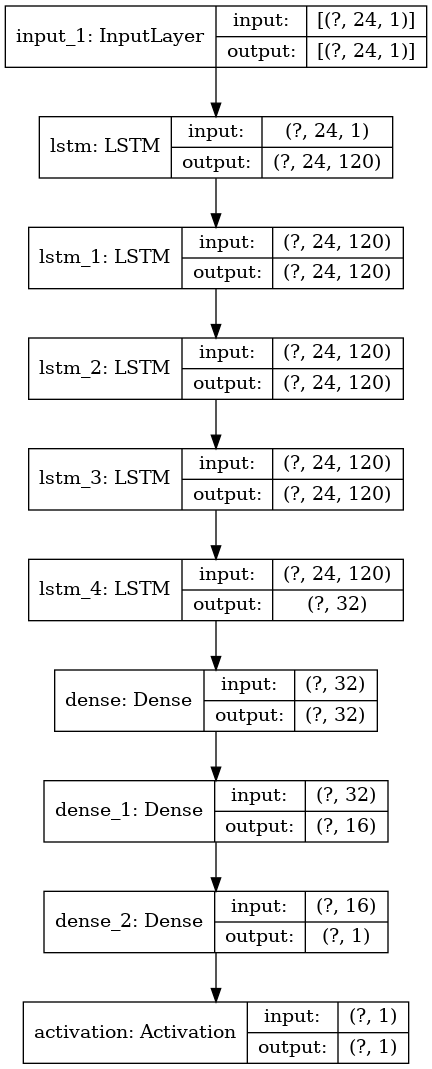

In [23]:
tf.keras.utils.plot_model(
    model,
    to_file="model.png",
    show_shapes=True,
    show_layer_names=True,
    rankdir="TB",
    expand_nested=True,
    dpi=96,
)

In [26]:
history = model.fit(x_train, y_train, 
                    validation_data=(x_valid, y_valid),
                    callbacks=[early_stopping, r_lr_plat,               model_checkpoint_callback],
                    batch_size=BATCH_SIZE, 
                    epochs=EPOCHS)


eval = model.evaluate(x_test, y_test, batch_size=BATCH_SIZE)
print('evaluate: ', eval)


Epoch 1/50
35/35 [==============================] - 14s 170ms/step - loss: 0.0046 - mse: 0.0046 - val_loss: 2.2427 - val_mse: 2.2427
Epoch 2/50
35/35 [==============================] - 4s 121ms/step - loss: 0.0015 - mse: 0.0015 - val_loss: 1.8667 - val_mse: 1.8667
Epoch 3/50
35/35 [==============================] - 5s 131ms/step - loss: 0.0015 - mse: 0.0015 - val_loss: 1.7480 - val_mse: 1.7480
Epoch 4/50
35/35 [==============================] - 5s 157ms/step - loss: 0.0012 - mse: 0.0012 - val_loss: 1.2401 - val_mse: 1.2401
Epoch 5/50
35/35 [==============================] - 5s 151ms/step - loss: 9.3942e-04 - mse: 9.3942e-04 - val_loss: 1.1813 - val_mse: 1.1813
Epoch 6/50
35/35 [==============================] - 5s 152ms/step - loss: 8.7054e-04 - mse: 8.7054e-04 - val_loss: 0.9697 - val_mse: 0.9697
Epoch 7/50
35/35 [==============================] - 6s 170ms/step - loss: 7.5567e-04 - mse: 7.5567e-04 - val_loss: 0.9365 - val_mse: 0.9365
Epoch 8/50
35/35 [==============================] -

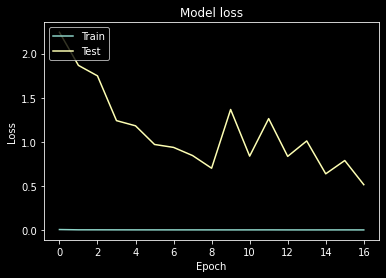

In [27]:
y_pred = model.predict(x_test)
# Visualize the training data
from matplotlib import pyplot as plt
plt.figure()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()
# plt.savefig('history.png')


In [70]:
y_pred_org = (y_pred * min_max_scaler.data_range_[0]) + min_max_scaler.data_min_[0] # min_max_scaler.inverse_transform(y_pred)
y_test_org = (y_test * min_max_scaler.data_range_[0]) + min_max_scaler.data_min_[0] # min_max_scaler.inverse_transform(y_test_t)
_ = regression_performance(y_pred_org.flatten(), y_test_org, print_results=True)

RMSE: 437.74
Performance Percentage: 0.84
Precision: 66.33
R2 Score Test = -7976538762.790
MAE Test =  9740.299


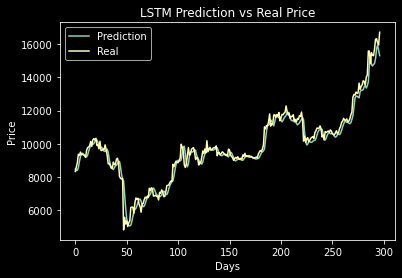

/home/hesam/miniconda3/envs/crypto/lib/python3.6/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


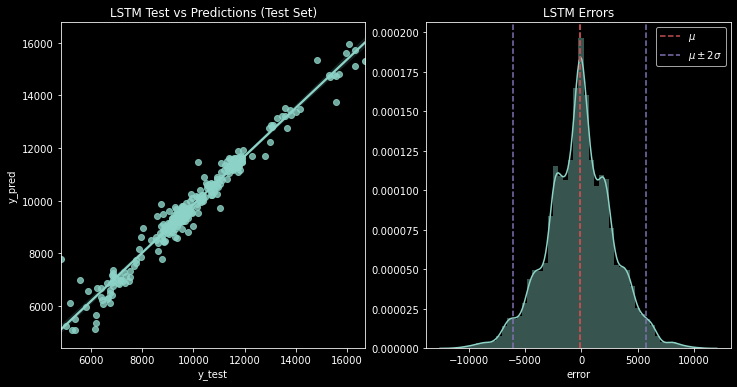

In [49]:
prediction_graph(y_pred_org, y_test_org, 'LSTM')
error_graph(y_pred_org, y_test_org, 'LSTM')

In [56]:
current_next_test   =   np.roll(y_test_org, 1)-y_test_org
current_next_pred   =   np.roll(y_pred_org, 1)-y_pred_org

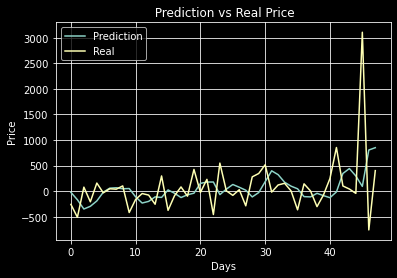

/home/hesam/miniconda3/envs/crypto/lib/python3.6/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


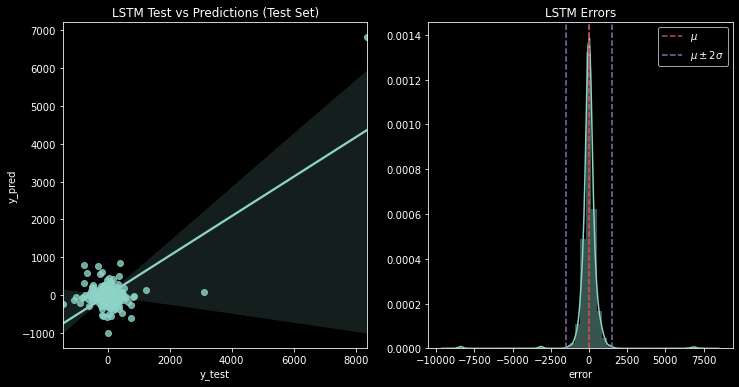

In [64]:
prediction_graph(current_next_pred[2:50], current_next_test[2:50])
error_graph(current_next_pred, current_next_test, 'LSTM')

In [8]:
# model.save('models/lstm_437')

# load with tf.keras.models.load_model
model   =   tf.keras.models.load_model('models/lstm_437')
y_pred = model.predict(x_test)
y_pred_org = (y_pred * min_max_scaler.data_range_[0]) + min_max_scaler.data_min_[0] # min_max_scaler.inverse_transform(y_pred)
y_test_org = (y_test * min_max_scaler.data_range_[0]) + min_max_scaler.data_min_[0] # min_max_scaler.inverse_transform(y_test_t)
_ = regression_performance(y_pred_org.flatten(), y_test_org, print_results=True)

RMSE: 437.74
Performance Percentage: 0.84
Precision: 66.33
R2 Score Test =  0.959
MAE Test =  299.526


In [12]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_15 (LSTM)               multiple                  58560     
_________________________________________________________________
lstm_16 (LSTM)               multiple                  115680    
_________________________________________________________________
lstm_17 (LSTM)               multiple                  115680    
_________________________________________________________________
lstm_18 (LSTM)               multiple                  115680    
_________________________________________________________________
lstm_19 (LSTM)               multiple                  19584     
_________________________________________________________________
dense_9 (Dense)              multiple                  1056      
_________________________________________________________________
dense_10 (Dense)             multiple                 

In [2]:
#   16
data    =   pd.read_csv('BTCUSD_2010_2021.csv', thousands=',')

data.Date   =   pd.to_datetime(data.Date)
# data.set_index('Date', inplace=True)
data.rename(columns={'Price': 'Close', 'Vol.':'Volume'}, inplace=True)
data.drop('Change %', axis=1, inplace=True)
data=   data[['Open', "High", "Low", "Close", "Volume", 'Date']]
data['Volume']  =   data['Volume'].replace({'K': '*1e3', 'M': '*1e6', '-':'-1'}, regex=True).map(pd.eval).astype(int)
data    =   data.reindex(index=data.index[::-1])
data.index  =   pd.date_range(data.Date.iloc[0], data.Date.iloc[-1], freq='D')
data.drop('Date', axis=1, inplace=True)

In [12]:
# extracts desired features out of raw data
from assets import Feature_Extractor as fe


res = pd.DataFrame()
pip_digit = 2

fe.rsi(data, res, 14, 'Close')
fe.rsi(data, res, 7, 'Close')
fe.ma(data, res, 7, 'Close')
fe.atr(data, res, 14)
fe.bollingerBand(data, res, 14)

fe.highest(data, res, 14)
fe.lowest(data, res, 14)
res = res.round(pip_digit)
res.index = data.index
# res.to_csv(f"jforex\\out\\{ins}_{date}_{res_name}.csv")



In [18]:
data_f  =   pd.concat([data, res], axis=1)

In [21]:
train   =   data_f.loc['2010':'2019']
test    =   data_f.loc['2020':]
train['target'] =   train.Close.shift(-1)
train['target'].iloc[-1]    =   train.target.iloc[-2]
test['target'] =   test.Close.shift(-1)
test['target'].iloc[-1]    =   test.target.iloc[-2]
x_train =   train.drop(['target'], axis=1)
y_train =   train['target']
x_test =   test.drop(['target'], axis=1)
y_test =   test['target']

<ipython-input-21-2465fcc6736c>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['target'] =   train.Close.shift(-1)
C:\Users\hdamg\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\core\indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
C:\Users\hdamg\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\core\indexing.py:692: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pyd

In [24]:
#   25
from sklearn.linear_model import (
    LinearRegression,
    BayesianRidge,
    RANSACRegressor
)
from sklearn.neural_network import MLPRegressor

from assets import get_sklearn_regression

regressors   =   [
    LinearRegression,
    BayesianRidge,
    RANSACRegressor, MLPRegressor
]


trained_regressors  =   get_sklearn_regression(regressors, x_train, y_train, x_test, y_test, graph=False, print_results=True)



Regressor: LinearRegression
RMSE: 1092.52
Performance Percentage: 0.85
Precision: 70.84
R2 Score Test =  0.996
MAE Test =  596.520

Regressor: BayesianRidge
RMSE: 1091.99
Performance Percentage: 0.85
Precision: 71.05
R2 Score Test =  0.996
MAE Test =  595.209

Regressor: RANSACRegressor
RMSE: 1209.86
Performance Percentage: 0.83
Precision: 71.46
R2 Score Test =  0.995
MAE Test =  651.320

Regressor: MLPRegressor
RMSE: 1406.22
Performance Percentage: 0.75
Precision: 69.61
R2 Score Test =  0.993
MAE Test =  820.036
